In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'RIDIBatang'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

***
커널 PCA
***
기존 주성분 분석은 데이터 행렬 X의 공분산 행렬을 고유값 분해한 후 고유 벡터를 새로운 좌표축에 할당하는 방법이었다.  
기존 데이터 포인트는 새로운 좌표축을 기준으로 좌표를 할당받았다.  
이때, 사용하는 새로운 좌표축에 해당하는 고유 벡터를 주성분이라고 불렀으며, 기존 데이터 포인트를 주성분에 직교 정사영하는 방법을 사용했었다.  

이에 반해, 커널 PCA는 기존 PCA를 일반화한 방법으로 비선형적으로 수행하는 방법이다.  

기존 데이터 행렬 X를 기존 행렬보다 큰 공간으로 매핑한 후 새로운 공간으로 이동한 데이터에 대해서 주성분 분석을 실시한다.  
그리고 데이터를 다시 원래 공간으로 매핑시키면 곡선 형태를 띈 주성분 축을 확인할 수 있다.  

***
다른 차원 축소 방법과 비교하기 위해 와인 데이터를 이용한다.
***

In [2]:
# 데이터 불러오기
raw_data = datasets.load_wine() # 사이킷런이 제공하는 와인 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)

# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 데이터 표준화
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
x_train = std_scale.fit_transform(x_train) # 학습 데이터를 스케일러로 표준화하고 적용한다.
x_test = std_scale.transform(x_test) # 테스트 데이터를 학습 데이터로 표준화된 스케일러에 적용한다.


(178, 13) (178,)
(133, 13) (45, 13) (133,) (45,)


***
커널 PCA를 통한 차원 축소
***

In [3]:
from sklearn.decomposition import KernelPCA # 커널 PCA 알고리즘 사용
# n_components 속성에 축소할 차원의 크기를 지정하고, kernel 속성에 사용할 커널의 형태를 지정해서 커널 PCA 모델을 만든다.
# kernel 속성 기본값은 'linear'이고 'poly', 'rbf', 'sigmoid', 'cosine','precomputed'를 지정할 수 있다. 
k_pca = KernelPCA(n_components=2, kernel='poly')

k_pca.fit(x_train) # 학습 데이터로 커널 PCA 모델을 학습시킨다.
x_train_kpca = k_pca.transform(x_train) #학습된 커널 PCA 모델에 학습 데이터를 적용시킨다.
# 학습은 학습 데이터로만 해야하고 테스트 데이터는 학습 데이터로 학습된 결과에 적용만 시킨다.
x_test_kpca = k_pca.transform(x_test)

# 차원 축소 이전 데이터의 차원을 확인하면 차원 축소 전의 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을 알 수 있고, 
# 주성분 분석을 이용, 차원 축소한 데이터는 2차원의 데이터 133개로 구성되어 있음을 알 수 있다. 
print(x_train_kpca.shape, x_test_kpca.shape) # ::before (133, 13) (45, 13) -> ::after (133, 2) (45, 2)

(133, 2) (45, 2)


In [4]:
# 고유값을 확인한다.
# lambdas_ 속성으로 고유값을 확인할 수 있다.
# 13차원의 학습 데이터를 2차원으로 차원 축소했으므로 2개의 고유값을 확인할 수 있다.
print(k_pca.lambdas_)

[193.89824561 118.0368972 ]


In [5]:
# 고유벡터를 확인한다. 
# alphas_ 속성으로 고유벡터를 확인할 수 있다. 
# 고유벡터는 각 고유값에 대응하는 벡터로, 이 고유 벡터가 주성분 벡터이다.
print(k_pca.alphas_)

[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]
 [ 0.107761    0.08440051]
 

***
커널 PCA를 통해 차원 축소된 데이터 시각화
***

In [6]:
# 차원 축소한 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train_kpca, columns=['kPCA_compute1', 'kPCA_compute2'])
x_train_df["label"] = y_train
x_train_df

,kPCA_compute1,kPCA_compute2,label
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0
...,...,...,...
128,-0.935327,0.094699,2
129,-2.091781,0.684901,2
130,-0.177160,-0.674989,1
131,-1.179702,0.125194,2


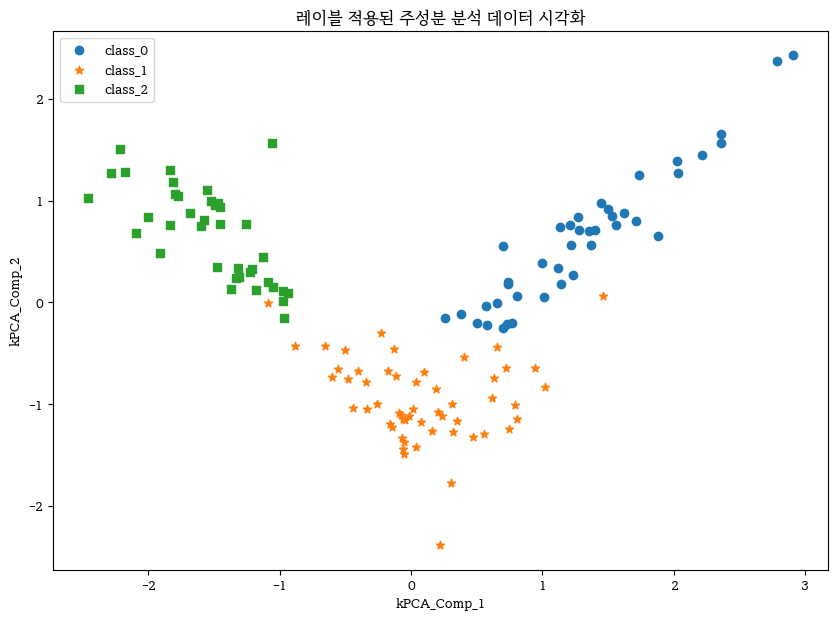

In [7]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s"]

for index, marker in enumerate(markers):
     df_index = x_train_df[x_train_df.label == index] # 레이블 별로 데이터를 분할한다.
     x = df_index.kPCA_compute1 # 레이블 별로 분할된 데이터에 첫번째 주성분 벡터를 추출한다.
     y = df_index.kPCA_compute2 # 레이블 별로 분할된 데이터에 두번째 주성분 벡터를 추출한다.
     label = raw_data.target_names[index] # 레이블 이름을 지정한다.
     plt.scatter(x=x, y=y, marker=marker, label= label ) # 산포도를 그린다.

plt.title("레이블 적용된 커널 PCA 데이터 시각화")
plt.xlabel("kPCA_Comp_1")
plt.ylabel("kPCA_Comp_2")
plt.legend()
plt.show()

***
커널 PCA 적용 전 데이터 학습 x_train
***

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier(max_depth=4, random_state=0) # 랜덤 포레스트 모델 객체 생성
rfc.fit(x_train, y_train) # 학습
predict = rfc.predict(x_test) #예측
print(predict)
confusion_matrix(y_test, predict) #혼동행렬

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


array([[18,  0,  0],
       [ 1, 16,  0],
       [ 0,  0, 10]], dtype=int64)

In [10]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



***
주성분 분석 적용 후 데이터 학습 x_train_kpca
***

In [11]:
rfc.fit(x_train_kpca, y_train) # 학습
predict = rfc.predict(x_test_kpca) #예측
print(predict)
confusion_matrix(y_test, predict) #혼동행렬

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 0 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


array([[18,  0,  0],
       [ 1, 16,  0],
       [ 1,  0,  9]], dtype=int64)

In [12]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.94      0.97        17
           2       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

